In [1]:
#import the necessary libraries for this analysis
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from math import sqrt

In [2]:
#load the train data into pandas dataframe
train = pd.read_csv('bigmart_train.csv')
#view the first five records
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Data Exploration phase

In [4]:
#view the shape of the dataframe
train.shape

(8523, 12)

In [5]:
#check for null values in the dataframe
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


In [7]:
#view the unique values in each column
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [8]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [10]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [11]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [12]:
train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

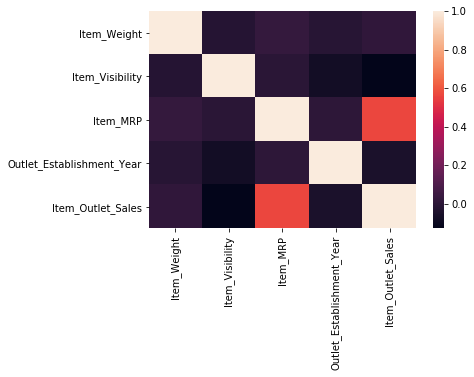

In [13]:
#creating a correlation plot of the features - This enables us to obtain feature relationship
corr = train.corr()
sns.heatmap(corr)

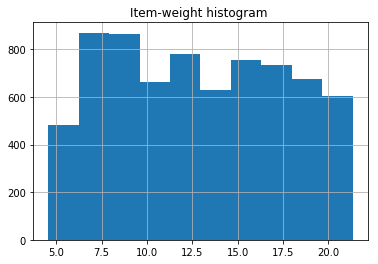

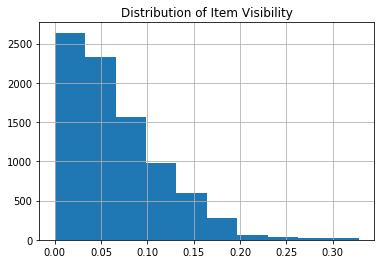

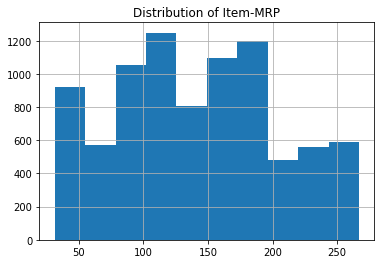

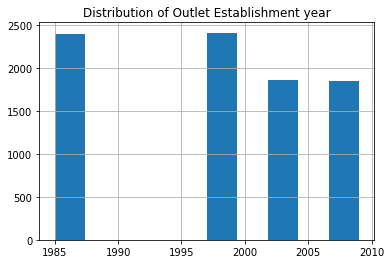

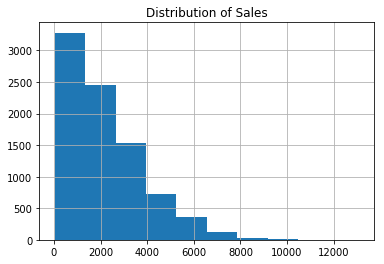

In [14]:
#creating histplots of the following features: 'Item_Weight','Item_Visibility',Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales'
train['Item_Weight'].hist(bins = 10)
plt.title('Item-weight histogram ')
plt.show()

train['Item_Visibility'].hist(bins = 10)
plt.title('Distribution of Item Visibility')
plt.show()

train['Item_MRP'].hist(bins = 10)
plt.title('Distribution of Item-MRP')
plt.show()

train['Outlet_Establishment_Year'].hist(bins = 10)
plt.title('Distribution of Outlet Establishment year')
plt.show()

train['Item_Outlet_Sales'].hist(bins = 10)
plt.title('Distribution of Sales')
plt.show()

# Data Preprocessing phase

In [15]:
#obtain the age of each outlet and place it in a new column
train['Outlet Age'] = 2018 - train['Outlet_Establishment_Year']
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31


In [16]:
#obtain the descriptive statistics of the dataframe
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet Age
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,20.168133
std,4.643456,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,9.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,14.000000
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,19.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,31.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,33.000000


In [17]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [18]:
#outlet size with the most occurence
train['Outlet_Size'].mode()[0]

'Medium'

In [19]:
#addresing missing values in item weight and outlet size.
#we can replace them with the mean and mode values respectively
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

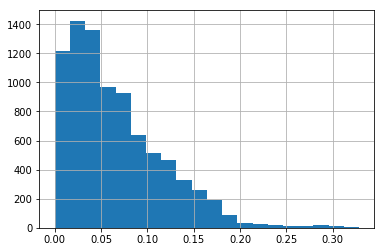

In [20]:
#plotting item visibility in a histogram plt
#we know that item visibility denote items that has been sold off
train['Item_Visibility'].hist(bins = 20)

In [21]:
#from th above plot we can see their exist outliers. We will remove the ouliers in the following steps
#we shall obtain the inter quartile range so as to utilize it in removing the outliers(since outliers are values above the Q3 OR below Q1 )
Q1 = train['Item_Visibility'].quantile(0.25)
Q3 = train['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
#next we obtain a new dataframe called filt train with the outliers removed
filt_train = train.query('(@Q1 - 1.5*@IQR) <= Item_Visibility <= (@Q3 + 1.5*@IQR)')

In [22]:
#display the shape of the new dataframe
filt_train.shape, train.shape

((8379, 13), (8523, 13))

In [23]:
train = filt_train
train.shape

(8379, 13)

In [24]:
train['Item_Visibility'].min(), train['Item_Visibility'].max(), train['Item_Visibility'].median()

(0.0, 0.195721125, 0.05272914)

In [25]:
#create a discrete bins(i.e., low viz, normal viz, high viz) from the visibility field
train['Item_Visibility_Bin'] = pd.cut(train['Item_Visibility'], [0.0,0.065, 0.13, 0.2], labels = ['low viz', 'normal viz', 'high viz'])

In [26]:
train['Item_Visibility_Bin'].unique()

[low viz, NaN, normal viz, high viz]
Categories (3, object): [low viz < normal viz < high viz]

In [27]:
#fill up NaN spaces with low viz
train['Item_Visibility_Bin'] = train['Item_Visibility_Bin'].replace(np.nan, 'low viz')

In [28]:
#intially we notice their were name irregularities in item_fat_content, such 'reg' for 'regular'. 
#now addressing these irregularities uing replace function
train['Item_Fat_Content']  = train['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')

In [29]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg', 'Regular')

In [30]:
#confirm changes
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [31]:
#next, change some certain feature categorical variables to numeric using label encoder
#initialize the label encoder
le = LabelEncoder()

In [32]:
#transforming the item_fat_content using the label encoder object le
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])

In [33]:
#transforming the item visibility bin
train['Item_Visibility_Bin'] = le.fit_transform(train['Item_Visibility_Bin'])

In [34]:
#transforming outlet size
train['Outlet_Size'] = le.fit_transform(train['Outlet_Size'])

In [35]:
#transforming outlet location type
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])

In [36]:
#view dataframe
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet Age,Item_Visibility_Bin
0,FDA15,9.300000,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,19,1
1,DRC01,5.920000,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,9,1
2,FDN15,17.500000,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,19,1
3,FDX07,19.200000,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,20,1
4,NCD19,8.930000,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,31,1
5,FDP36,10.395000,1,0.000000,Baking Goods,51.4008,OUT018,2009,1,2,Supermarket Type2,556.6088,9,1
6,FDO10,13.650000,1,0.012741,Snack Foods,57.6588,OUT013,1987,0,2,Supermarket Type1,343.5528,31,1
7,FDP10,12.857645,0,0.127470,Snack Foods,107.7622,OUT027,1985,1,2,Supermarket Type3,4022.7636,33,2
8,FDH17,16.200000,1,0.016687,Frozen Foods,96.9726,OUT045,2002,1,1,Supermarket Type1,1076.5986,16,1
9,FDU28,19.200000,1,0.094450,Frozen Foods,187.8214,OUT017,2007,1,1,Supermarket Type1,4710.5350,11,2


In [37]:
#create dummies for outlet type
dummy = pd.get_dummies(train['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [38]:
#merging both train and dummy dataframes
train = pd.concat([train, dummy], axis = 1)

In [39]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet Age                     int64
Item_Visibility_Bin            int32
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

In [40]:
#we will be using only the relevant columns for model building. Hence, dropping the irrelevant columns
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet Age', 'Item_Visibility_Bin',
       'Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'],
      dtype='object')

In [41]:
train = train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type'], axis = 1)
#note the above can also be achieved using PCA or linear discriminant analysis or factor analysis

# Data Modeling - Using ElasticNetCV linear regression algorithm

In [42]:
#creating the features and target variables
X = train.drop(['Item_Outlet_Sales'], axis = 1)
Y = train['Item_Outlet_Sales']

In [43]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet Age,Item_Visibility_Bin,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,19,1,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,9,1,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,19,1,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,20,1,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,31,1,0,1,0,0


In [44]:
Y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [46]:
#import train_test split from sklearn model selection
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 24)

In [61]:
from sklearn.linear_model import ElasticNet
#create a model estimator for elasticnet
linreg = ElasticNet(alpha = 0.00001, normalize= True, random_state= 12)

In [90]:
#fit the model and obtain the coefficients and intercept
linreg.fit(x_train, y_train)
print(linreg.coef_)
print(linreg.intercept_)

[-9.34003173e-01  4.77365663e+01 -5.22273610e+02  1.53635376e+01
  1.68195049e+01  3.26046871e+00 -6.95601092e-01  1.38888014e+01
 -1.71477589e+03  1.57510315e+02 -1.42739985e+02  1.48644967e+03]
-21.38612557684928


In [63]:
#predict with the test data
y_pred = linreg.predict(x_test)
#perform accuracy check(option one) 
#obtain the rmse
print('rmse: ', np.sqrt(mean_squared_error(y_test, y_pred)))
#obtain the r squared value
print('R-squared: ', r2_score(y_test, y_pred))

rmse:  1107.1982020693877
R-squared:  0.5724522126329324


In [64]:
print(linreg.get_params())

{'alpha': 1e-05, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1000, 'normalize': True, 'positive': False, 'precompute': False, 'random_state': 12, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
